# A2 - Bias on Wikipedia 
### Angel Wang

The goal of this assignment is to explore 'bias' in terms of article quantity and article quality regarding political figures on Wikipedia for many countries.
Data I used for this assignment is a combination of Wikipedia articles data and country population data. And for Wikipedia articles, I used a machine learning algorithm 'ORES' to evaluate the quality of each article.  ORES reads article revision id as an input and it will output a quality score for each article.  
There are 6 score categories here:  
FA - Featured article  
GA - Good article   
B - B-class article     
C - C-class article   
Start - Start-class article   
Stub - Stub-class article   
And a csv file will be saved after calculating score for each article and combining with population dataset with following attributes:   

| Column         | 
| ------------------|
| country          | 
| article_name |
| revision_id.    | 
| article_quality |
| population      |

For analysis, I calculated the proportion of articles per capita (number of articles regarding politicians divided by the population) and high-quality articles (number of high-quality articles divided by the total articles regarding politicians) for each country. An article is 'high-quality' when 'ORES' evaluates it in the 'FA (Featured Article)' or 'GA (Good Article)' category.  
There will be four visualizations generated for this assignment:   
10 countries with the highest proportion of politician articles per capita.   
10 countries with the lowest proportion of politician articles per capita.   
10 countries with the highest proportion of high-quality politician articles of all politician articles.   
10 countries with the lowest proportion of high-quality politician articles of all politician articles.   

And a short reflection on this assignment in the end.    

In [687]:
# Import Libraries
import requests
import json
import pandas as pd
import csv
import numpy as np
import pylab
from pandas import DataFrame
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline  

/Users/BebeBibi/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Getting the Wikipedia politician article and population data

The Wikipedia article dataset is from Figshare. https://figshare.com/articles/Untitled_Item/5513449. The Wikipedia article dataset can be downloaded as 'page_data.csv' and used in latter analysis.The dataset has 47198 rows and 3 variables: country, page and last_edit. 'country' is the country where the politician is from. 'page' is the article title. And 'last_edit' is the edit ID of the last user who edits the page.    

The population data is from Population Research Bureau website.http://www.prb.org/DataFinder/Topic/Rankings.aspx?ind=14. The population dataset can be downloaded as 'Population Mid-2015.csv' and used in latter analysis. The dataset has 21 rows (210 countries in total) and 5 variables: Location,  Location Type, TimeFrame, DataType and Data.
'Location' is the country name. 'Location Type' is always 'Country'.' TimeFrame' is 'Mid-2015'. Data Type is 'Number'. And 'Data' is the country population. We will extract only country name sand population variables for analysis.    

In [715]:
# Population data
population_data = []
with open('Population Mid-2015.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        try:
            population_data.append([row[0], row[4]])
        except:
            continue
Population = pd.DataFrame(population_data)
new_header = Population.iloc[0] 
Population = Population[1:]
Population.columns = ['country', 'population']
Population['population'] = Population['population'].str.replace(',', '')
Population['population'] = Population['population'].astype(int)

In [716]:
# article score data
article_data = []
with open('page_data.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        article_data.append([row[1],row[0],row[2]])

### Getting article quality predictions
And for Wikipedia articles, I used a machine learning algorithm 'ORES' (Objective revision Evaluation service) to evaluate the quality of each article. ORES reads article revision id as an input and it will output a quality score  and probabilities the the article's predicted quality for each article.  I extracted only the predicted quality score for analysis.   
There are 6 score categories here:  
FA - Featured article  
GA - Good article   
B - B-class article     
C - C-class article   
Start - Start-class article   
Stub - Stub-class article   

Documentation on what each score category means can be found at https://en.wikipedia.org/wiki/Wikipedia:WikiProject_assessment#Grades   

Since we have about 47198 articles in the Wikipedia dataset, I divided the dataset into 5 baches to speed up ORES prediction and combine the result together at the end.

In [745]:
score_ls = []
article_ls = []
rev_id_ls = []
country_ls = []
for x in range(1,10000):
    params = {'project' : 'enwiki',
              'model' : 'wp10',
              'revid' : article_data[x][2]
              }

    api_call = requests.get(endpoint.format(**params))
    response = api_call.json()
    score = json.dumps(response['enwiki']['scores'][article_data[x][2]]['wp10']['score']['prediction'])
    score1 = score.replace('"','')
    score_ls.append(score1)
    rev_id_ls.append(article_data[x][2])
    article_ls.append(article_data[x][1])
    country_ls.append(article_data[x][0])

In [747]:
score_ls2 = []
article_ls2 = []
rev_id_ls2 = []
country_ls2 = []
for x in range(10000,20000):
    params = {'project' : 'enwiki',
              'model' : 'wp10',
              'revid' : article_data[x][2]
              }

    api_call = requests.get(endpoint.format(**params))
    response = api_call.json()
    score = json.dumps(response['enwiki']['scores'][article_data[x][2]]['wp10']['score']['prediction'])
    score1 = score.replace('"','')
    score_ls2.append(score1)
    rev_id_ls2.append(article_data[x][2])
    article_ls2.append(article_data[x][1])
    country_ls2.append(article_data[x][0])

In [750]:
score_ls3 = []
article_ls3 = []
rev_id_ls3 = []
country_ls3 = []
for x in range(20000,30000):
    params = {'project' : 'enwiki',
              'model' : 'wp10',
              'revid' : article_data[x][2]
              }

    api_call = requests.get(endpoint.format(**params))
    response = api_call.json()
    score = json.dumps(response['enwiki']['scores'][article_data[x][2]]['wp10']['score']['prediction'])
    score1 = score.replace('"','')
    score_ls3.append(score1)
    rev_id_ls3.append(article_data[x][2])
    article_ls3.append(article_data[x][1])
    country_ls3.append(article_data[x][0])

In [753]:
score_ls4 = []
article_ls4 = []
rev_id_ls4 = []
country_ls4 = []
for x in range(30000,40000):
    params = {'project' : 'enwiki',
              'model' : 'wp10',
              'revid' : article_data[x][2]
              }

    api_call = requests.get(endpoint.format(**params))
    response = api_call.json()
    score = json.dumps(response['enwiki']['scores'][article_data[x][2]]['wp10']['score']['prediction'])
    score1 = score.replace('"','')
    score_ls4.append(score1)
    rev_id_ls4.append(article_data[x][2])
    article_ls4.append(article_data[x][1])
    country_ls4.append(article_data[x][0])

In [782]:
score_ls5 = []
article_ls5 = []
rev_id_ls5 = []
country_ls5 = []
for x in range(40000,47198):
    try:
        params = {'project' : 'enwiki',
                  'model' : 'wp10',
                  'revid' : article_data[x][2]
                  }

        api_call = requests.get(endpoint.format(**params))
        response = api_call.json()
        score = json.dumps(response['enwiki']['scores'][article_data[x][2]]['wp10']['score']['prediction'])
        score1 = score.replace('"','')
        score_ls5.append(score1)
        rev_id_ls5.append(article_data[x][2])
        article_ls5.append(article_data[x][1])
        country_ls5.append(article_data[x][0])
    except Exception:
        pass

In [783]:
# Combine data in 5 baches together.
all_score_ls = score_ls+score_ls2+score_ls3+score_ls4+score_ls5
all_rev_id_ls = rev_id_ls+rev_id_ls2+rev_id_ls3+rev_id_ls4+rev_id_ls5
all_article_ls = article_ls+article_ls2+article_ls3+article_ls4+article_ls5
all_country_ls = country_ls+country_ls2+country_ls3+country_ls4+country_ls5

article_list = pd.DataFrame(
    {'article_quality': all_score_ls,
     'revision_id': all_rev_id_ls,
     'article_name':all_article_ls,
     'country':all_country_ls
    })

### Combining the datasets
After generating a new column of ORES prediction score for each article, inner join the Wikipedia article dataset and population dataset together by country name (remove rows with null values). The data frame has following columns (revision_id is the same as the last_edit column in the Wikipedia article dataset):   

| Column          |  
| ----------------|  
| country         |   
| article_namemmm |  
| revision_id    |  
| article_quality |  
| population      |  

A final data file will be saved as wikipedia_article_population.csv.   

In [910]:
# Merge Population data and Article data
a2data = pd.merge(Population, article_list, on='country', how='inner')
a2data = a2data[['country', 'article_name', 'revision_id', 'article_quality', 'population']]

In [911]:
# Write to csv
a2data.to_csv('wikipedia_article_population.csv', sep=',',  index = False)

### Analysis
For analysis, I calculated the proportion of articles per capita (number of articles regarding politicians divided by the population) and high-quality articles (number of high-quality articles divided by the total articles regarding politicians) for each country. An article is 'high-quality' when 'ORES' evaluates it in the 'FA (Featured Article)' or 'GA (Good Article)' category.  


In [863]:
# Show proportion as percentage
pd.options.display.float_format = '{:.5%}'.format

In [912]:
# calculating the proportion of articles per capita for each country.
article_count = a2data.groupby('country').count()['article_name']
articles_per_population = pd.merge(Population, article_count.to_frame().reset_index(), on='country', how='inner')
articles_per_population['articles_per_population']=articles_per_population['article_name']/articles_per_population['population']

In [938]:
# calculating the proportion of high-quality ("FA" or "GA") articles for each country.
high_quality = pd.concat([a2data.loc[a2data['article_quality']=='FA'], a2data.loc[a2data['article_quality']=='GA']])
high_quality_count = high_quality.groupby('country').count()['article_name']
high_quality_percentage = pd.merge(articles_per_population, high_quality_count.to_frame().reset_index(), on='country', how='inner')
high_quality_percentage['high_quality_percentage']=high_quality_percentage['article_name_y']/high_quality_percentage['article_name_x']
high_quality_analysis = high_quality_percentage[['country','high_quality_percentage']]

### Visualization
The visualization will show:  
10 countries with the highest proportion of politician articles per capita.   
10 countries with the lowest proportion of politician articles per capita.   
10 countries with the highest proportion of high-quality politician articles of all politician articles.   
10 countries with the lowest proportion of high-quality politician articles of all politician articles.   

In [939]:
# rank1 is the country rank by proportion of politician articles percapita
# rank2 is the country rank by rpoportion of high-quality politician article of all politician ariticles.
rank1 =articles_per_population.sort_values(['articles_per_population'], ascending=[False])
rank1_reverse =articles_per_population.sort_values(['articles_per_population'], ascending=[True])
rank2 =high_quality_analysis.sort_values(['high_quality_percentage'], ascending=[False])
rank2_reverse  =high_quality_analysis.sort_values(['high_quality_percentage'], ascending=[True])

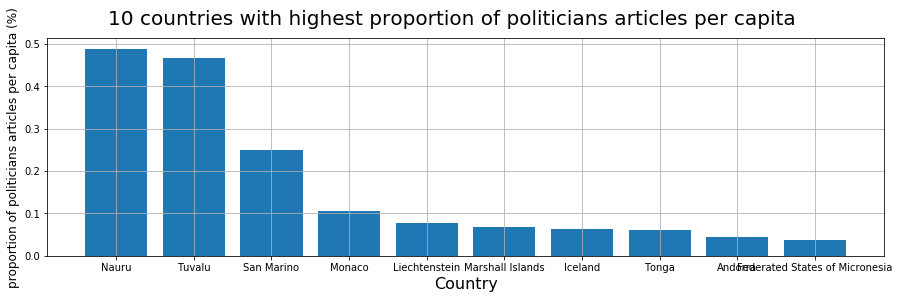

In [945]:
#10 countries with highest proportion of articles-per-capita
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
x=[1,2,3,4,5,6,7,8,9,10]
labels=rank1[:10]['country'].tolist()
y=[x * 100 for x in rank1[:10]['articles_per_population'].tolist()]
ax.bar(x,y, align='center')
plt.suptitle('10 countries with highest proportion of politicians articles per capita', fontsize=20)
plt.xticks(x, labels)
plt.xlabel('Country', fontsize=16)
plt.ylabel('proportion of politicians articles per capita (%)', fontsize=12)
plt.grid(True)

In [946]:
# save the plot
fig.savefig('10 countries with highest proportion of politicians articles per capita.png')

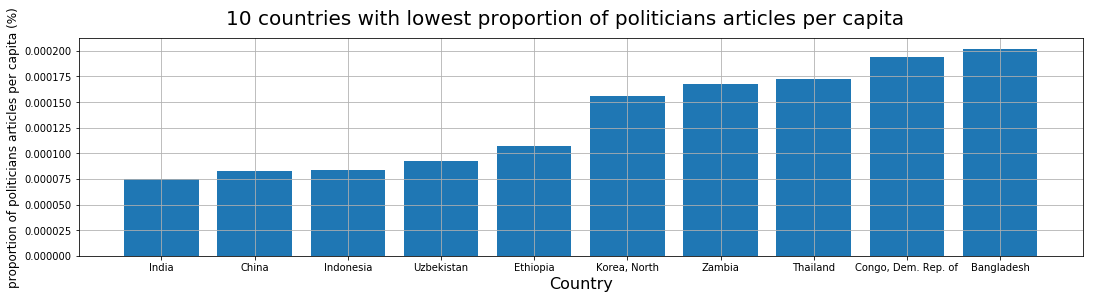

In [947]:
#10 countries with lowest proportion of politicians articles per capita
fig = plt.figure(figsize=(18,4))
ax = plt.subplot(111)
x=[1,2,3,4,5,6,7,8,9,10]
labels=rank1_reverse [:10]['country'].tolist()
y=[x * 100 for x in rank1_reverse [:10]['articles_per_population'].tolist()]
ax.bar(x,y, align='center')
plt.suptitle('10 countries with lowest proportion of politicians articles per capita', fontsize=20)
plt.xticks(x, labels)
plt.xlabel('Country', fontsize=16)
plt.ylabel('proportion of politicians articles per capita (%)', fontsize=12)
plt.grid(True)

In [948]:
# save the plot
fig.savefig('10 countries with lowest proportion of politicians articles per capita.png')

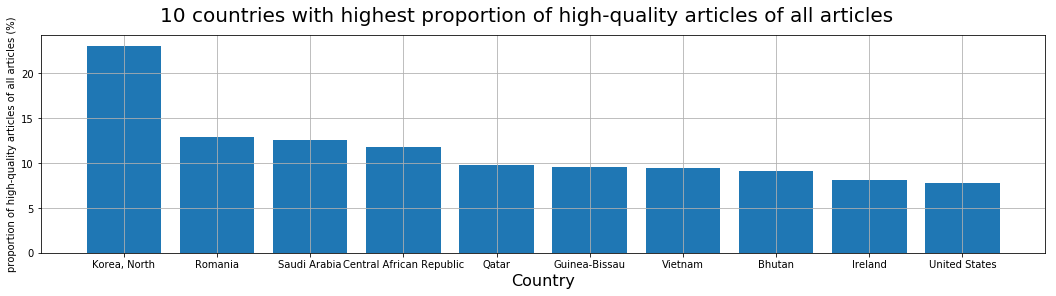

In [949]:
#10 countries with highest proportion of high-quality articles of all articles for each country
fig = plt.figure(figsize=(18,4))
ax = plt.subplot(111)
x=[1,2,3,4,5,6,7,8,9,10]
labels=rank2[:10]['country'].tolist()
y=[x * 100 for x in rank2[:10]['high_quality_percentage'].tolist()]
ax.bar(x,y, align='center')
plt.suptitle('10 countries with highest proportion of high-quality articles of all articles', fontsize=20)
plt.xticks(x, labels)
plt.xlabel('Country', fontsize=16)
plt.ylabel('proportion of high-quality articles of all articles (%)', fontsize=10)
plt.grid(True)

In [950]:
# save the plot
fig.savefig('10 countries with highest proportion of high-quality articles of all articles.png')

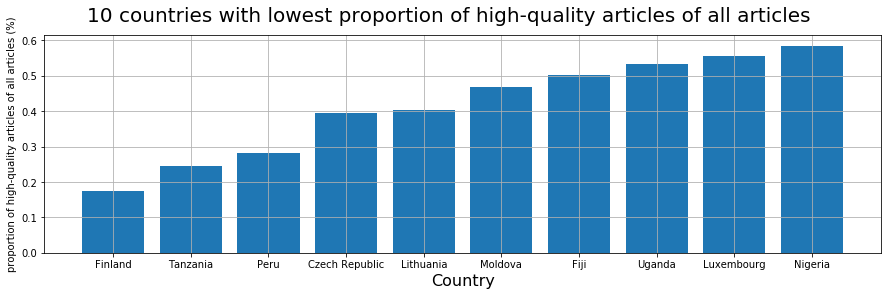

In [951]:
#10 countries with lowest proportion of high-quality articles of all articles for each country
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(111)
x=[1,2,3,4,5,6,7,8,9,10]
labels=rank2_reverse [:10]['country'].tolist()
y=[x * 100 for x in rank2_reverse [:10]['high_quality_percentage'].tolist()]
ax.bar(x,y, align='center')
plt.suptitle('10 countries with lowest proportion of high-quality articles of all articles', fontsize=20)
plt.xticks(x, labels)
plt.xlabel('Country', fontsize=16)
plt.ylabel('proportion of high-quality articles of all articles (%)', fontsize=10)
plt.grid(True)

In [952]:
# save the plot
fig.savefig('10 countries with lowest proportion of high-quality articles of all articles.png')

## Reflection

First, there are some findings from the plots we got previsouly. In terms of proportion of politician article per capita, it makes sense that countries with less population has higher percentage of politician articles. Therefore, countries like India and China should have the lowest proportion of politician articles per capita. As for percentage of high-quality politician articles, I would expecct English-speaker countries should have higher percentage. What surprised me is that North Korea alghough has pretty low proportion of politician articles per capita, has the highest percentage of high-quality politician articles. 

During the anaysis, I also found that there are some countries that do not have any politican articles on Wikipedia at all. So Wikepedia has a lot of opporunities to improve its content coverage on the politics topic.

The percentage of high-quality politican articles for most countries on below 10%. Sometimes the last bad edits may cause the article quality bad. After certain times of edits of an article, more edits may make the article quality lower. So I am not sure how accurate Wikipedia articles are, if we want to conduct research on related topics.

Another question came to my mind is that for those non-english speaking countries, what is the nationality of the editors for the politican articles. If English is not their native language, how will that affect the quality of the articles.